In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
cobr = yf.Ticker('cobr.l')
cobr

yfinance.Ticker object <COBR.L>

In [4]:
cobr_data = cobr.history(period='max')
cobr_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602.000000,602.000000,602.000000,602.000000,6.020000e+02,602.0,602.0
mean,1.648434,1.719922,1.570920,1.652359,2.991472e+06,0.0,0.0
std,0.661333,0.726067,0.600849,0.658958,6.349563e+06,0.0,0.0
min,0.725000,0.650000,0.650000,0.725000,0.000000e+00,0.0,0.0
25%,1.250000,1.250000,1.250000,1.250000,0.000000e+00,0.0,0.0
50%,1.250000,1.250000,1.250000,1.250000,7.100260e+05,0.0,0.0
75%,2.200000,2.324000,2.054500,2.200000,3.668438e+06,0.0,0.0
max,3.500000,3.900000,3.300000,3.500000,6.326053e+07,0.0,0.0


In [5]:
cobr_data.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-15,1.675,1.748,1.675,1.75,116500,0,0
2018-11-16,1.750,1.750,1.750,1.75,0,0,0
2018-11-19,1.650,1.650,1.650,1.65,0,0,0


## plot with matplotlib using data from 2020-1-1

In [ ]:
cobr_2020 = cobr_data[cobr_data.index >= '2020-1-1']

In [9]:
cobr_2020.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,1.25,1.25,1.25,1.25,0,0,0
2020-01-03,1.25,1.25,1.25,1.25,0,0,0
2020-01-06,1.25,1.25,1.25,1.25,0,0,0
2020-01-07,1.25,1.25,1.25,1.25,0,0,0
2020-01-08,1.25,1.25,1.25,1.25,0,0,0


#### add 'raised price' into the graph

### ---提示，column 名称将显示在图例中, 统一命名，比如Placing_Price_Feb

In [11]:
# create raised price column, fill in cobr rasied price, 2.25p, from 2020.2 onwards

cobr_2020['r_price_feb'] = 2.25

# chage the Jan raised price to 0, because it started on Feb
cobr_2020.iloc[:22,7] = 0

In [12]:
# second raise happend in 2020-9, at the price 2.30p

cobr_2020['r_price_sep'] = 2.30

# chage the Jan raised price to 0, because it started on Feb
cobr_2020.loc[cobr_2020.index <= '2020-8-31', 'r_price_sep'] = 0

#### the highest day 's index data

In [325]:
idx = cobr_2020[cobr_2020['Close'] == cobr_2020.Close.max()].index

DatetimeIndex(['2020-10-20'], dtype='datetime64[ns]', name='Date', freq=None)

In [320]:
idx

DatetimeIndex(['2020-10-20'], dtype='datetime64[ns]', name='Date', freq=None)

#### 增加 feb和sep raised price 的具体价格

#### 加入ylim, xylable, legend, title控制

#### 加入最高点的数据和plot

#### 已基本完成主要功能实现，需要将数据应用在其他stock上边

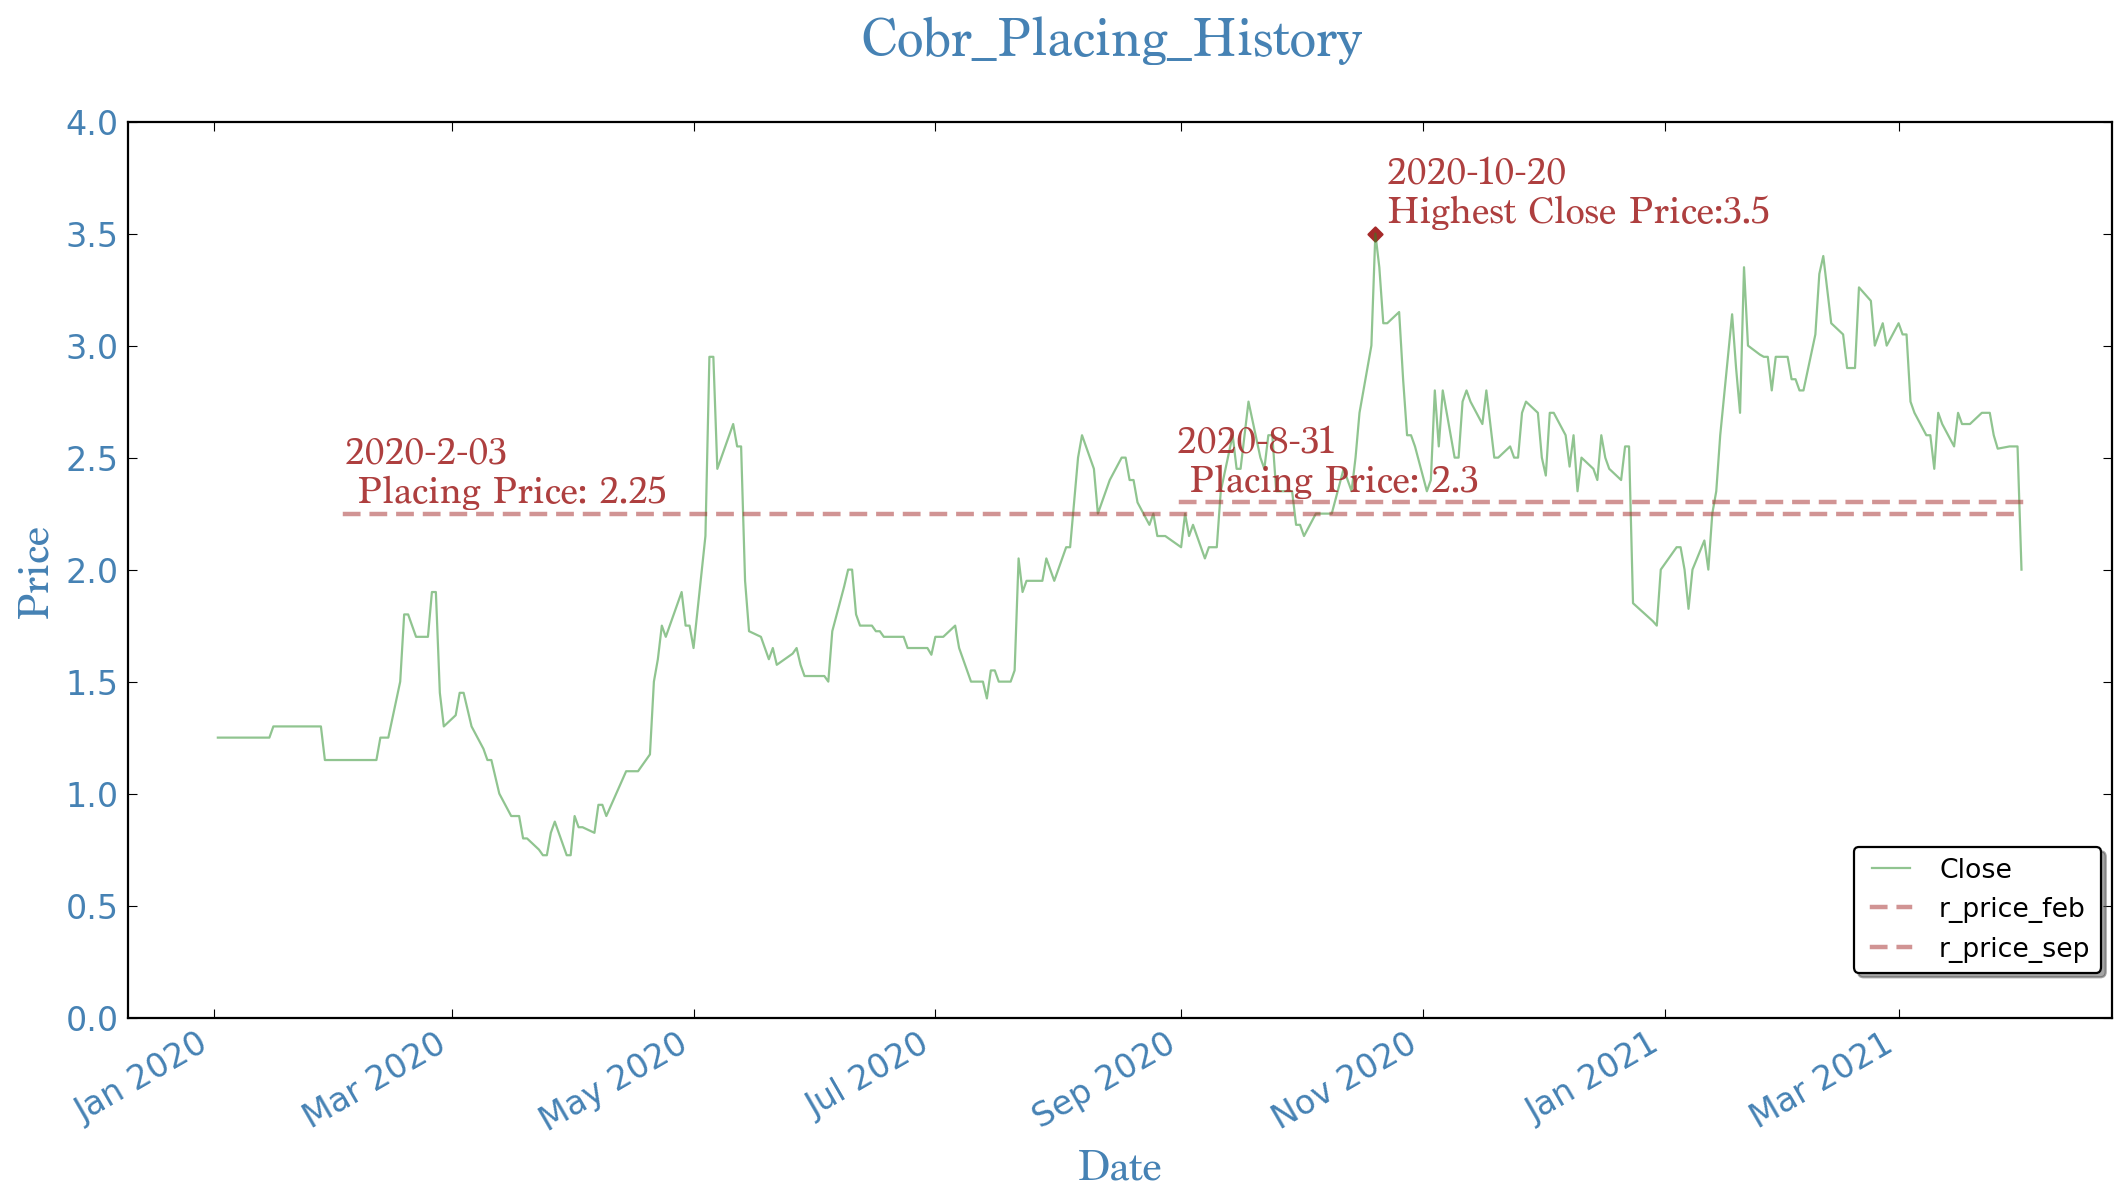

In [319]:
# size and style
plt.figure(figsize=(16,8) , frameon=False) 
plt.style.use('_classic_test_patch')

#______________________________________________________________________________________

# CONTRAL PANEL
date_placing1 = '2020-2-03'
date_placing2 = '2020-8-31'

price_placing1 = 2.25
price_placing2 = 2.30

# colour scheme control
clr_close = 'forestgreen'
alpha_close = 0.5
clr_placing1 = 'brown'
alpha_placing1 = 0.9
alpha_placing1_line = 0.5
clr_placing2 = 'brown'
alpha_placing2 = 0.9
alpha_placing2_line = 0.5
clr_HCP = 'brown'
alpha_HCP = 0.9
clr_title = 'steelblue'

# font
font = 'Marion'

#______________________________________________________________________________________
# plot the close price
cobr_2020.Close.plot( color=clr_close, alpha=alpha_close, linewidth=1)

# plot placing text and lines
cobr_2020[date_placing1:].r_price_feb.plot( color= clr_placing1, alpha=alpha_placing1_line, linewidth=2, ls='dashed',dash_capstyle='projecting')
cobr_2020[cobr_2020.index >= date_placing2].r_price_sep.plot( color=clr_placing2, alpha=alpha_placing2_line, linewidth=2, ls='dashed',dash_capstyle='projecting')

plt.text(date_placing1, price_placing1+0.05, '{} \n Placing Price: {}'.format(date_placing1,price_placing1), fontsize=18, color= clr_placing1, alpha=alpha_placing1, fontname=font)
plt.text(date_placing2, price_placing2+0.05, '{} \n Placing Price: {}'.format(date_placing2,price_placing2), fontsize=18, color= clr_placing2, alpha=alpha_placing2, fontname=font)

# plot the highest close price dot
plt.scatter(idx, cobr_2020.Close.max(), color=clr_HCP, marker='D');
plt.text(idx, cobr_2020.Close.max()+0.05, ' {}\n Highest Close Price:{}'.format(str(idx[0])[:10], cobr_2020.Close.max()),fontname=font, fontsize=18, color=clr_HCP, alpha = alpha_HCP)

# title, legend, labels and others
plt.title('Cobr_Placing_History \n', fontsize=25, color=clr_title,fontname=font)
plt.legend(loc=(0.87,0.05), fontsize=12, frameon=True, fancybox=True,shadow=True)

plt.yticks(fontsize=15,color=clr_title)
plt.ylabel('Price', fontsize=20,fontname=font, color=clr_title)
plt.ylim(0,4)

plt.xticks(fontsize=15,color=clr_title)
plt.xlabel('Date', fontsize=20,fontname=font, color=clr_title)

# from matplotlib.dates import DateFormatter
# date_form = DateFormatter("%m-%d")
# plt.set_major_formatter(date_form)

plt.savefig('cobr',dpi=300,bbox_inches ='tight',
pad_inches = 1,
transparent = True,
facecolor ='g',
orientation ='landscape')
plt.show()


#### 接下来有一些美化工作要做，选择合适的颜色，可以存成pdf或者png。如果这样的话，是不是可以直接用matplotlib来生成pdf文档呢

In [219]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
 
for font in font_manager.fontManager.ttflist:
    # 查看字体名以及对应的字体文件名
    print(font.name, '-', font.fname)

cmex10 - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf
STIXSizeThreeSym - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf
DejaVu Sans Mono - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf
DejaVu Serif - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf
STIXGeneral - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf
DejaVu Sans - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf
cmss10 - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf
DejaVu Sans - /Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
STIXGeneral - /Users/paxton615/opt/a

.SF NS Display Condensed - /System/Library/Fonts/SFNSDisplayCondensed-Medium.otf
UNAVAILABLE - /Users/paxton615/Library/Fonts/迷你简行楷碑.TTF
Gill Sans - /System/Library/Fonts/Supplemental/GillSans.ttc
????????? - /Users/paxton615/Library/Fonts/游狼美钢行书简.TTF
Hiragino Sans - /System/Library/Fonts/ヒラギノ角ゴシック W2.ttc
????? - /Users/paxton615/Library/Fonts/国祥手写体.TTF
FZZJ-LJDWBFW - /Users/paxton615/Library/Fonts/方正字迹-吕建德魏碑繁体.TTF
System Font - /System/Library/Fonts/SFNS.ttf
ZIKUTANGSFXST - /Users/paxton615/Library/Fonts/黄庭坚书法字体.TTF
Symbol - /System/Library/Fonts/Symbol.ttf
FZZJ-XSLSFW - /Users/paxton615/Library/Fonts/方正字迹-潇洒隶书繁体.TTF
Noto Sans Ol Chiki - /System/Library/Fonts/Supplemental/NotoSansOlChiki-Regular.ttf
HY GUOJINGMINGJ - /Users/paxton615/Library/Fonts/郭敬明体.TTF
HYHeLongXingShuW - /Users/paxton615/Library/Fonts/汉仪合龙行书.TTF
?? - /Users/paxton615/Library/Fonts/谭体楷书字体.TTF
FZZJ-XSLSJW - /Users/paxton615/Library/Fonts/方正字迹-潇洒隶书简体.TTF
Bangla MN - /System/Library/Fonts/Supplemental/Bangla MN.ttc


In [260]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
 
for font in font_manager.fontManager.ttflist:
    # 查看字体名以及对应的字体文件名
    print(font.name)

cmex10
STIXSizeThreeSym
DejaVu Sans Mono
DejaVu Serif
STIXGeneral
DejaVu Sans
cmss10
DejaVu Sans
STIXGeneral
STIXSizeOneSym
DejaVu Sans Display
DejaVu Serif
STIXGeneral
STIXNonUnicode
DejaVu Sans
STIXSizeFourSym
STIXNonUnicode
DejaVu Sans Mono
DejaVu Sans
DejaVu Serif Display
cmmi10
STIXSizeOneSym
DejaVu Serif
STIXNonUnicode
cmb10
STIXNonUnicode
STIXGeneral
cmtt10
DejaVu Sans Mono
cmr10
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeTwoSym
DejaVu Sans Mono
DejaVu Serif
STIXSizeThreeSym
STIXSizeTwoSym
cmsy10
Heiti TC
HYYanKaiF
FZZJ-LTPGLJW
chenweixun-yingxing
Senty Pea ?????
???????X
HY?W?tH
HYYiNingLiJ
Euphemia UCAS
LiuJian-Mao-Cao
UNAVAILABLE
AaQingCong
HYFanXiaoGeLiShuJ
Times New Roman
Tahoma
Sinhala Sangam MN
??-?????
CNganKaiHKS
FZQiDiT-R-GB
.Keyboard
Tensentype TieShanKaiShuJ
MengXianMin
FZZJ-ZTGBXSJW
?????
yuweij
Mishafi
.SF NS Display Condensed
FZXingKai-S04T
Skia
MLiHK
CNganKaiHK
Trebuchet MS
Arial Unicode MS
Shree Devanagari 714
Gujarati Sangam MN
STIXIntegralsSm
Big Caslon
Apple Bra

In [74]:
print(style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Solarize_Light2


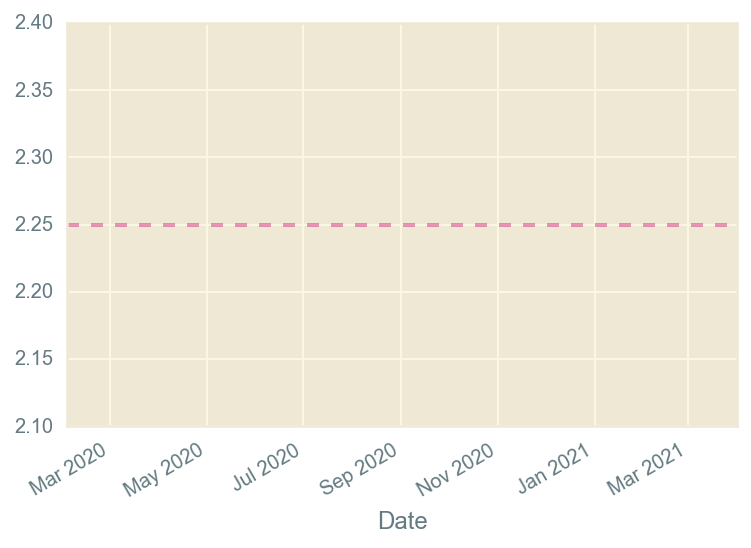

_classic_test_patch


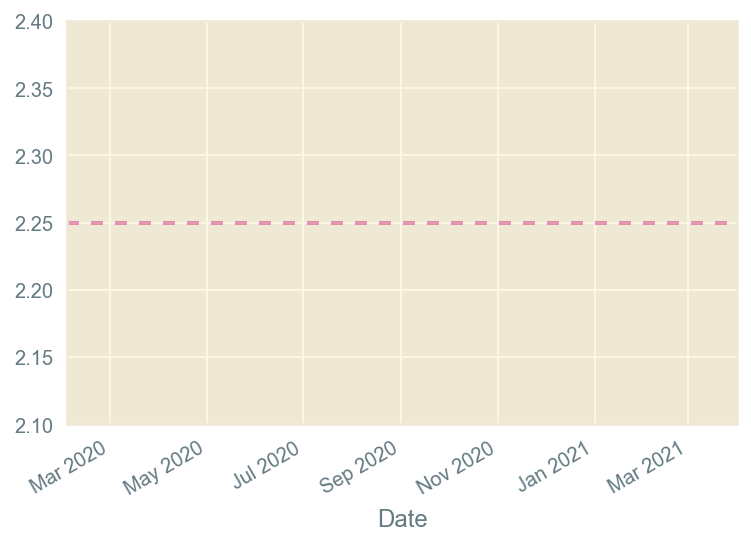

bmh


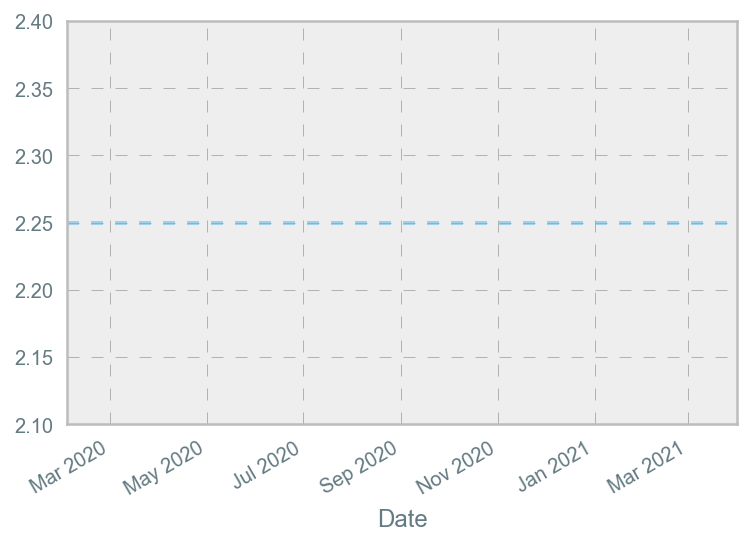

classic


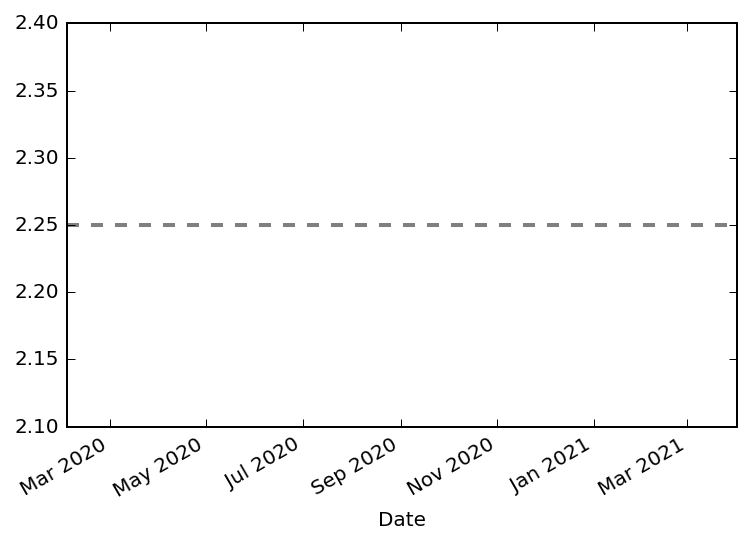

dark_background


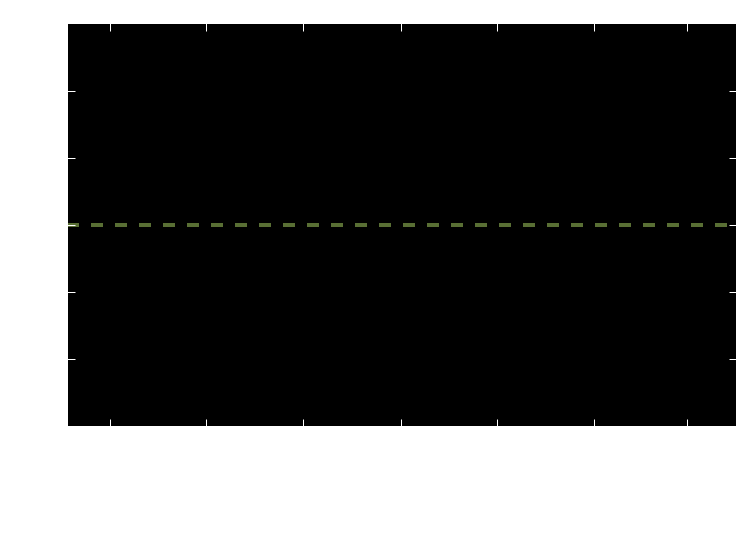

fast


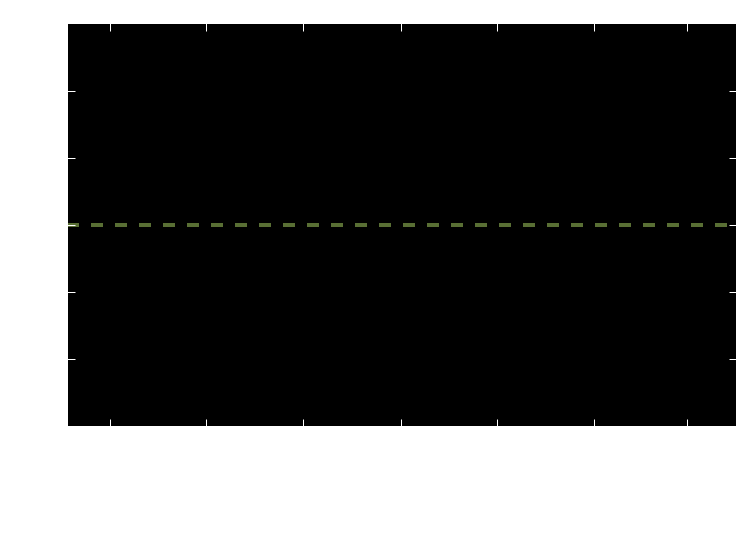

fivethirtyeight


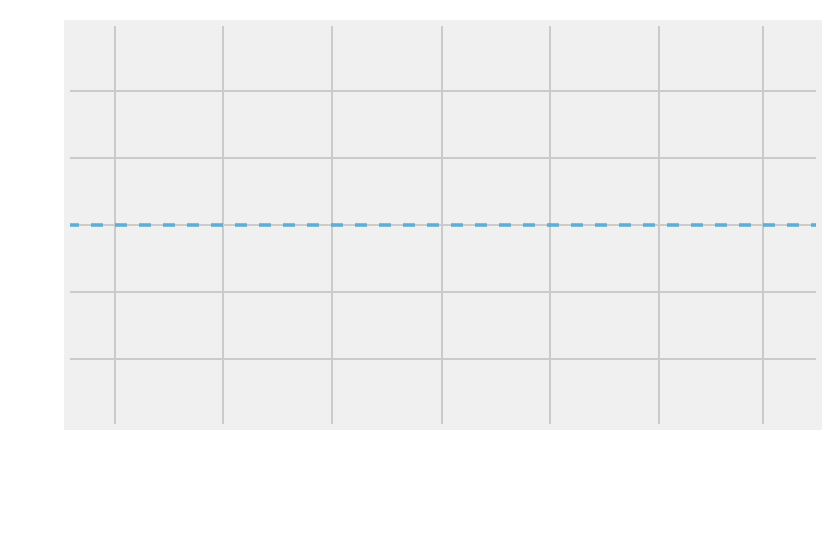

ggplot


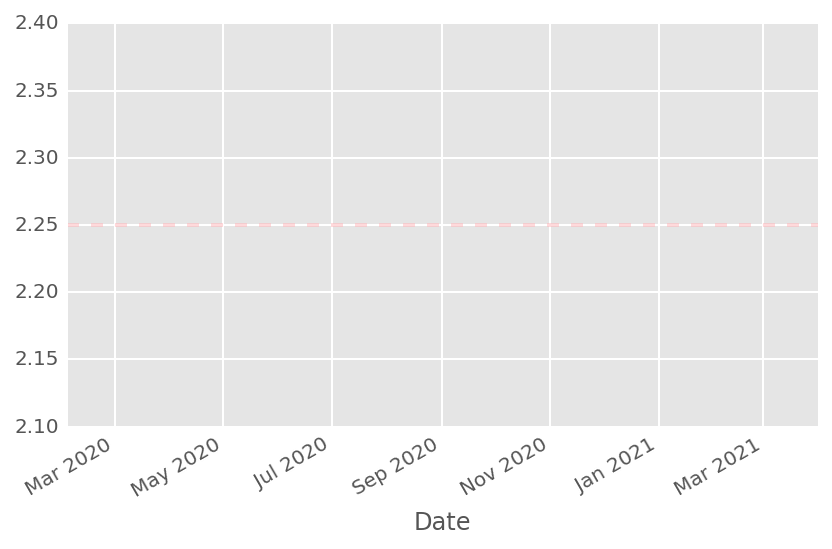

grayscale


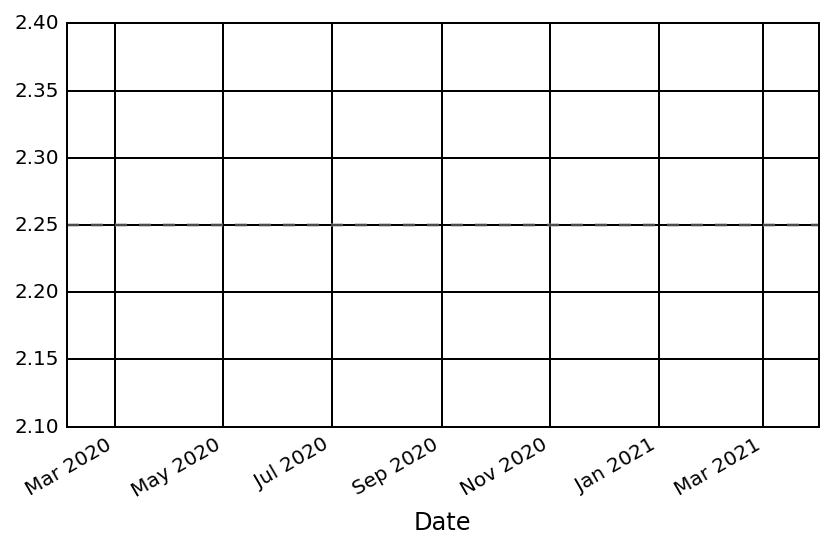

seaborn


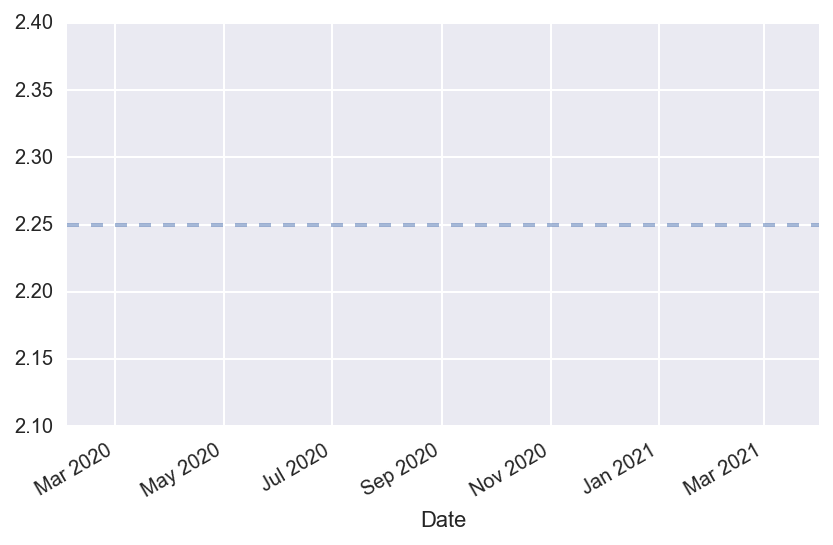

seaborn-bright


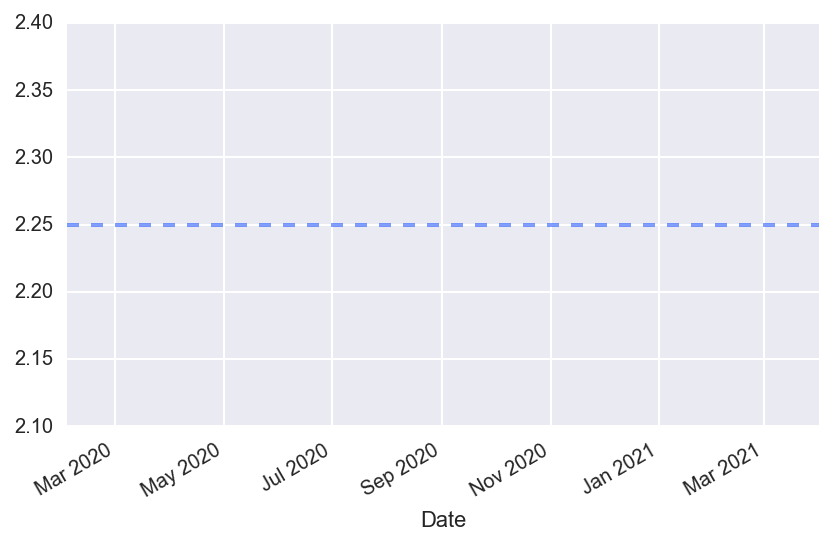

seaborn-colorblind


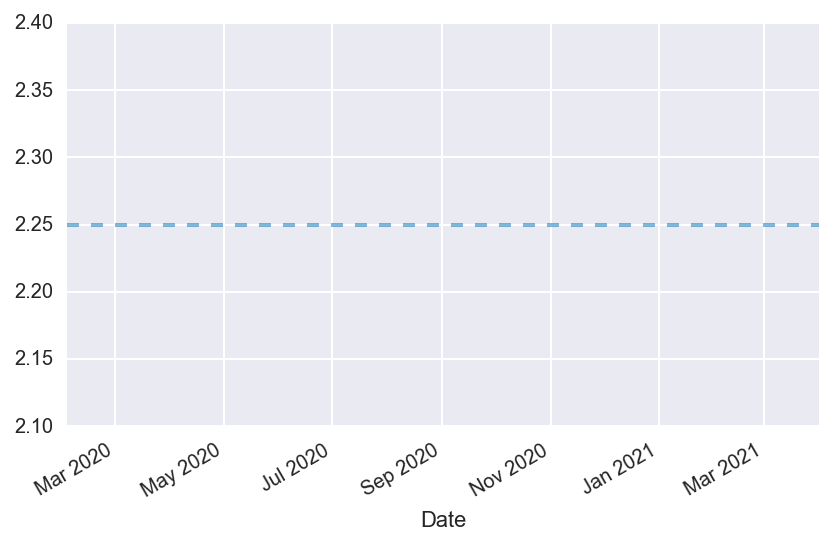

seaborn-dark


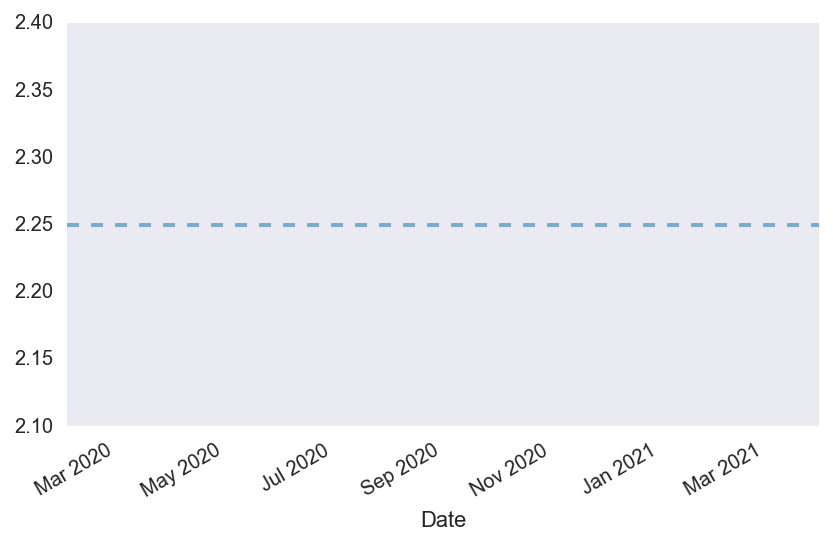

seaborn-dark-palette


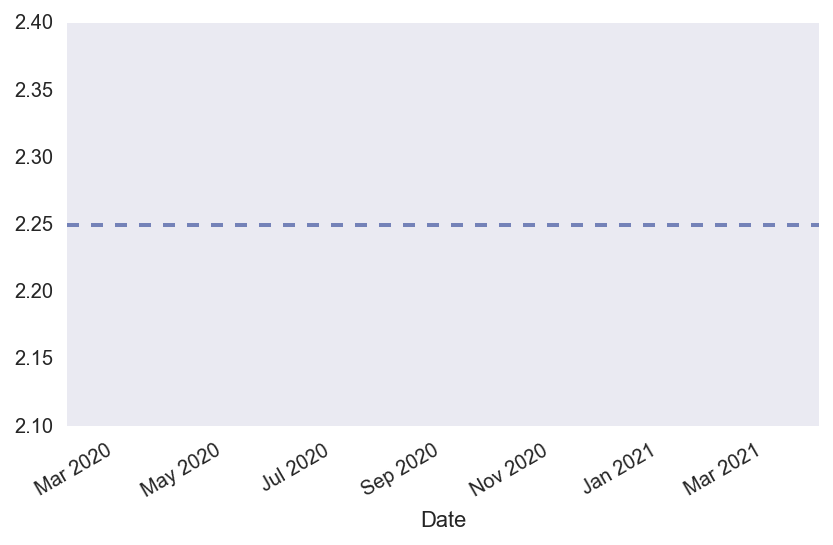

seaborn-darkgrid


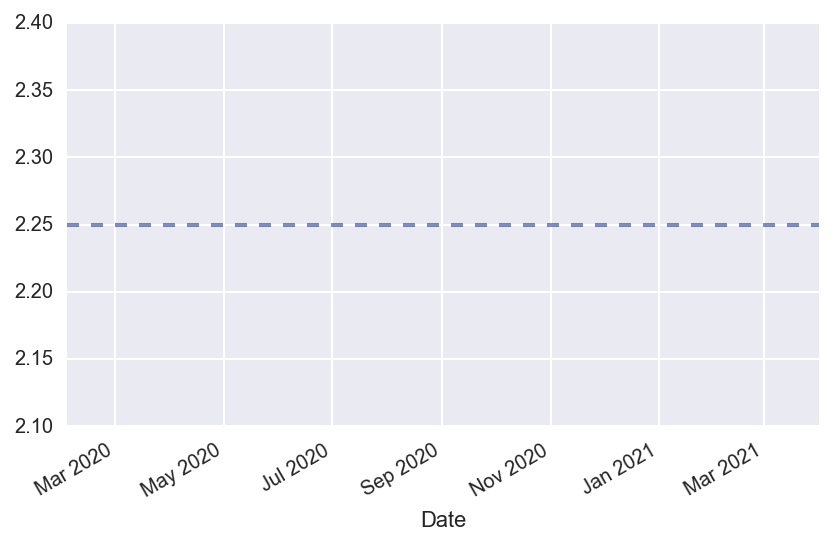

seaborn-deep


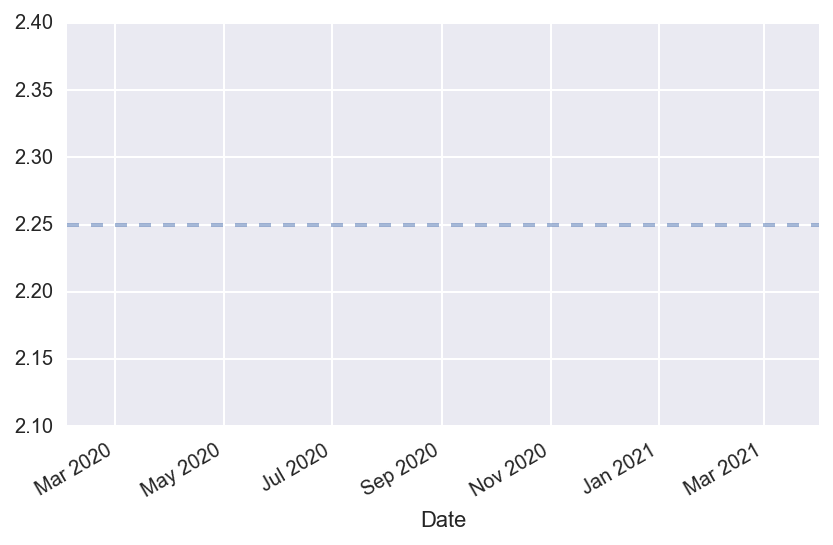

seaborn-muted


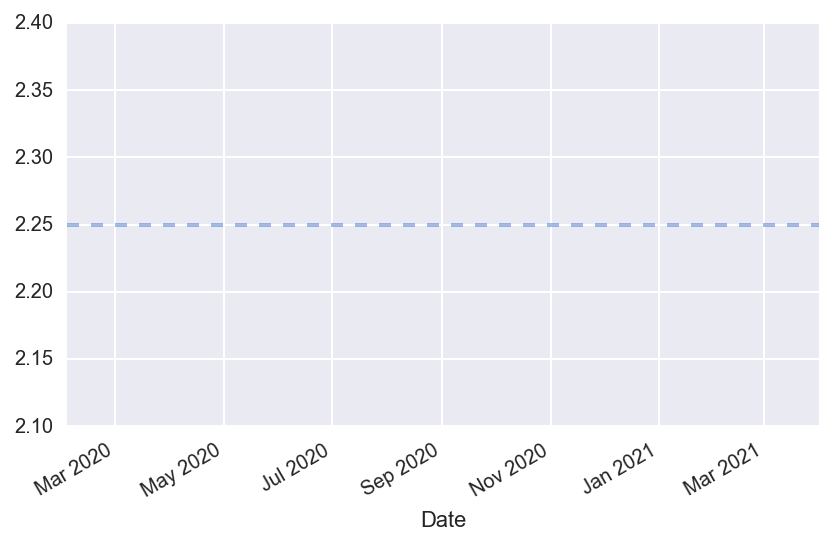

seaborn-notebook


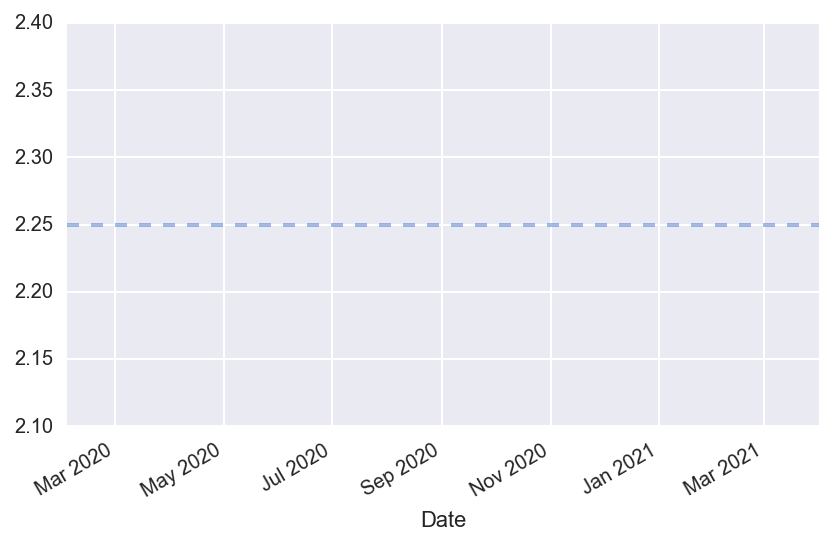

seaborn-paper


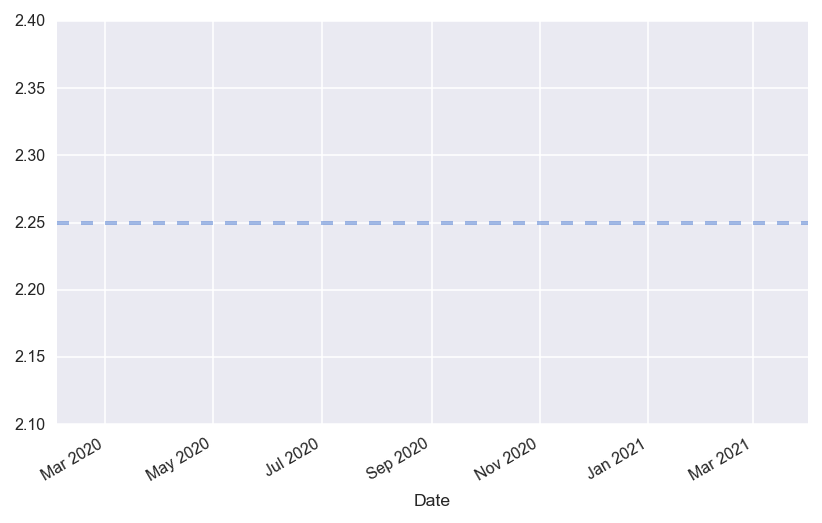

seaborn-pastel


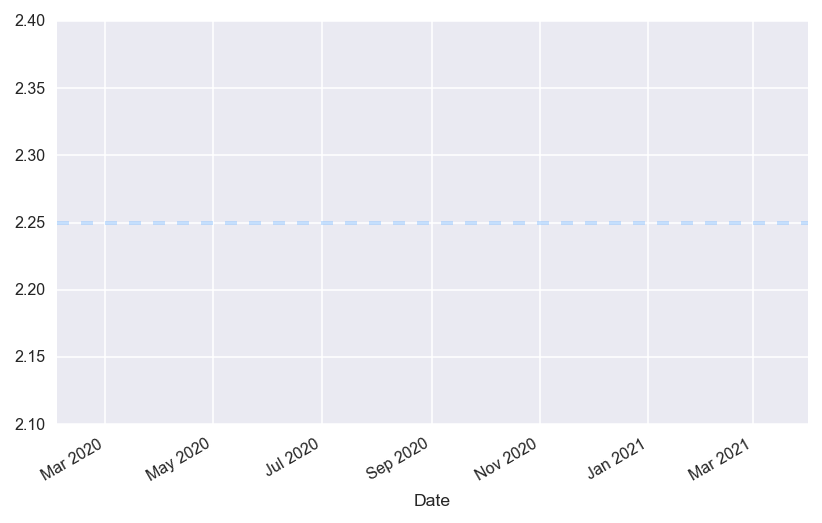

seaborn-poster


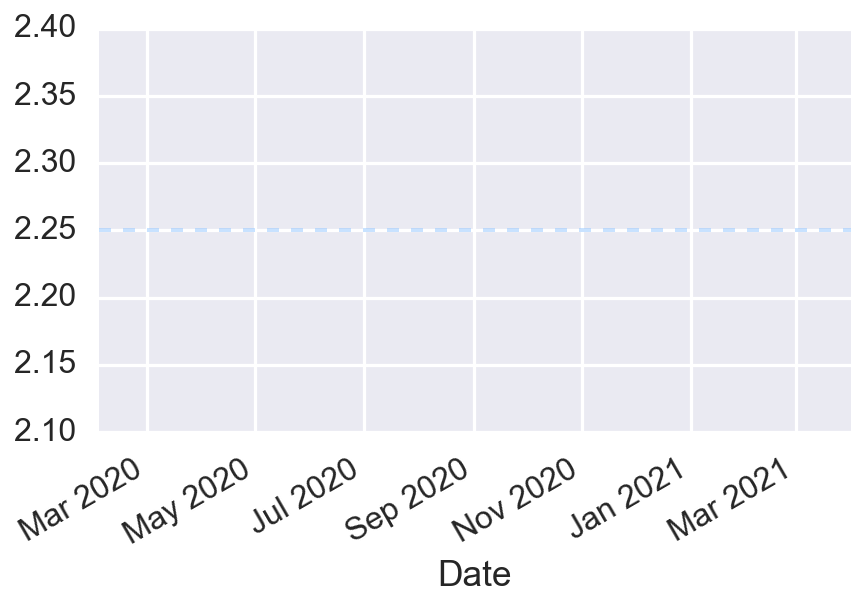

seaborn-talk


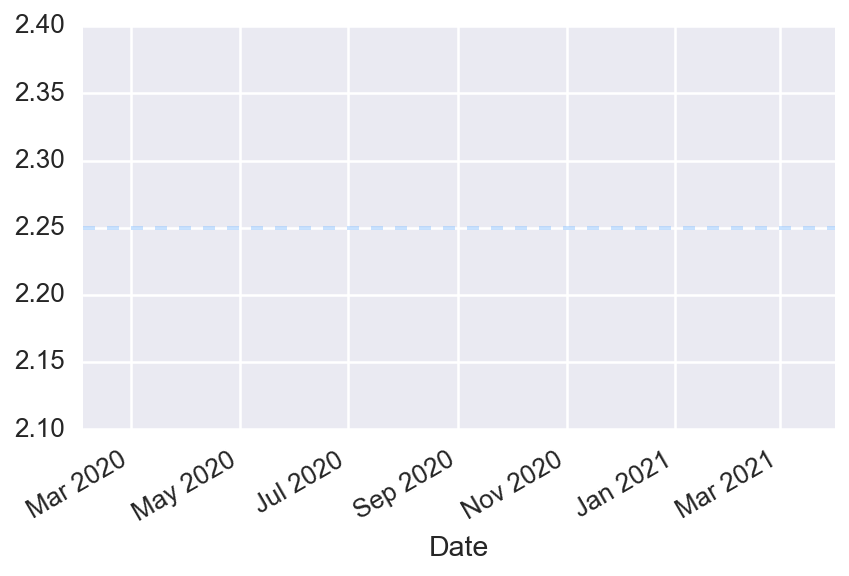

seaborn-ticks


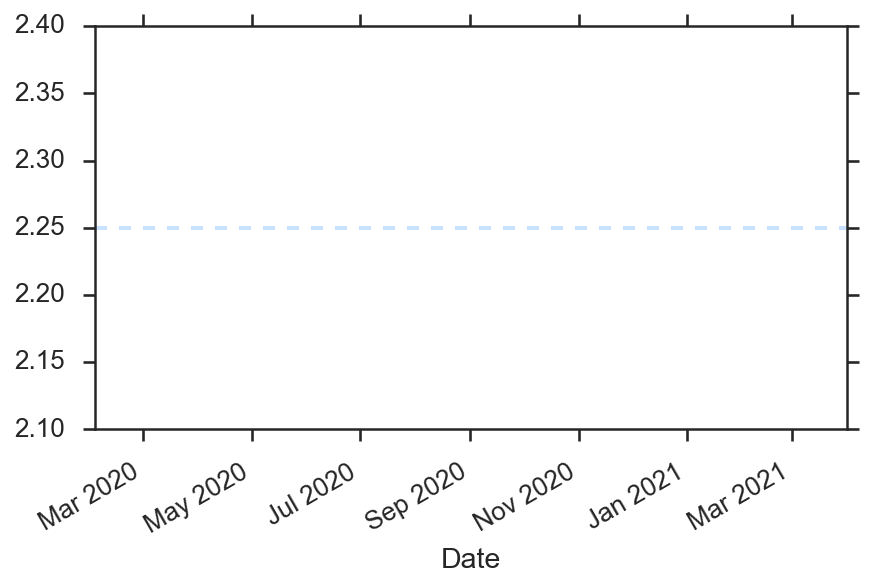

seaborn-white


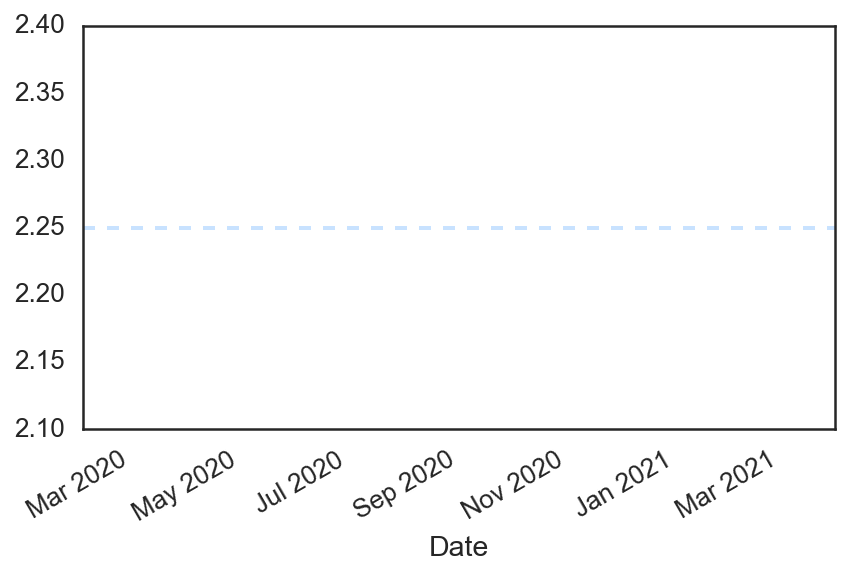

seaborn-whitegrid


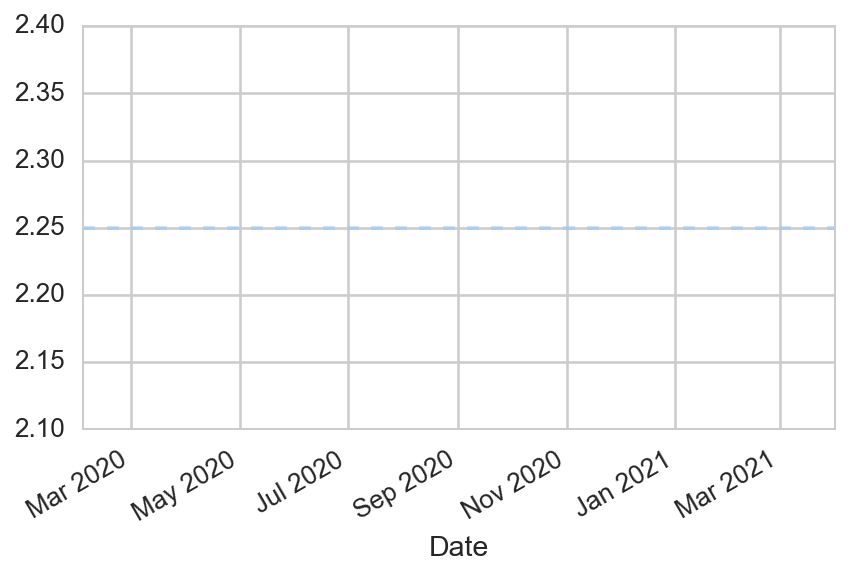

tableau-colorblind10


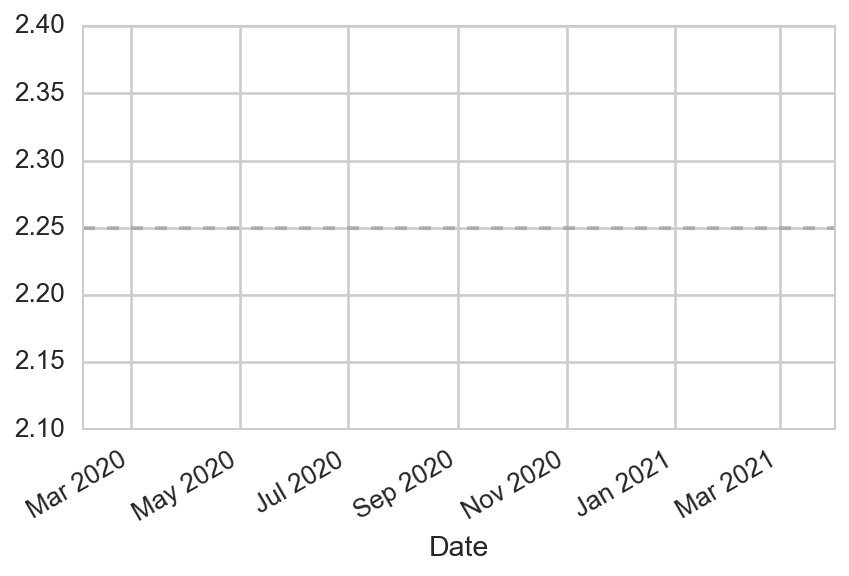

In [75]:
stl = style.available
for i in stl:
    
    plt.style.use(i)
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline
    
    print(i)
    cobr_2020['2020-2-03':].r_price_feb.plot( color='C6', alpha=0.5, linewidth=2, ls='dashed')

    plt.show()